In [21]:
#pip install --upgrade tensorflow

In [23]:
#pip install --upgrade keras

In [48]:
cd C://python_files/transfer_learning

C:\python_files\transfer_learning


In [1]:
from inception_resnet_v1_lcl import *
from functools import partial
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import add
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_model = InceptionResNetV1(input_shape=(224, 224, 3),
                               dropout_keep_prob=0.8)

In [3]:
base_model = InceptionResNetV1(weights_path='./model/0803_1700',
                               input_shape=(224, 224, 3),
                               dropout_keep_prob=0.8)


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x000002E680166790> and <tensorflow.python.keras.layers.core.Dropout object at 0x000002E6F826A8B0>).


In [4]:
for layer in base_model.layers[:]:
    layer.trainable = False
base_model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 111, 111, 32) 96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 111, 111, 32) 0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [5]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 Conv2d_1a_3x3
2 Conv2d_1a_3x3_BatchNorm
3 Conv2d_1a_3x3_Activation
4 Conv2d_2a_3x3
5 Conv2d_2a_3x3_BatchNorm
6 Conv2d_2a_3x3_Activation
7 Conv2d_2b_3x3
8 Conv2d_2b_3x3_BatchNorm
9 Conv2d_2b_3x3_Activation
10 MaxPool_3a_3x3
11 Conv2d_3b_1x1
12 Conv2d_3b_1x1_BatchNorm
13 Conv2d_3b_1x1_Activation
14 Conv2d_4a_3x3
15 Conv2d_4a_3x3_BatchNorm
16 Conv2d_4a_3x3_Activation
17 Conv2d_4b_3x3
18 Conv2d_4b_3x3_BatchNorm
19 Conv2d_4b_3x3_Activation
20 Block35_1_Branch_2_Conv2d_0a_1x1
21 Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm
22 Block35_1_Branch_2_Conv2d_0a_1x1_Activation
23 Block35_1_Branch_1_Conv2d_0a_1x1
24 Block35_1_Branch_2_Conv2d_0b_3x3
25 Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm
26 Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm
27 Block35_1_Branch_1_Conv2d_0a_1x1_Activation
28 Block35_1_Branch_2_Conv2d_0b_3x3_Activation
29 Block35_1_Branch_0_Conv2d_1x1
30 Block35_1_Branch_1_Conv2d_0b_3x3
31 Block35_1_Branch_2_Conv2d_0c_3x3
32 Block35_1_Branch_0_Conv2d_1x1_BatchNorm
33 Block35_1_B

In [6]:
classes = 10
epochs = 100
#epochs = 500
targetx = 224
targety = 224

x = base_model.get_layer(index=442).output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu',  kernel_initializer='he_normal', bias_initializer='zeros')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(classes, activation='softmax')(x)

my_model = Model(inputs=base_model.input, outputs=predictions)

my_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 111, 111, 32) 96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 111, 111, 32) 0           Conv2d_1a_3x3_BatchNorm[0][0]    
______________________________________________________________________________________________

In [7]:
for i, layer in enumerate(my_model.layers):
    print(i,layer.name)

0 input_2
1 Conv2d_1a_3x3
2 Conv2d_1a_3x3_BatchNorm
3 Conv2d_1a_3x3_Activation
4 Conv2d_2a_3x3
5 Conv2d_2a_3x3_BatchNorm
6 Conv2d_2a_3x3_Activation
7 Conv2d_2b_3x3
8 Conv2d_2b_3x3_BatchNorm
9 Conv2d_2b_3x3_Activation
10 MaxPool_3a_3x3
11 Conv2d_3b_1x1
12 Conv2d_3b_1x1_BatchNorm
13 Conv2d_3b_1x1_Activation
14 Conv2d_4a_3x3
15 Conv2d_4a_3x3_BatchNorm
16 Conv2d_4a_3x3_Activation
17 Conv2d_4b_3x3
18 Conv2d_4b_3x3_BatchNorm
19 Conv2d_4b_3x3_Activation
20 Block35_1_Branch_2_Conv2d_0a_1x1
21 Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm
22 Block35_1_Branch_2_Conv2d_0a_1x1_Activation
23 Block35_1_Branch_1_Conv2d_0a_1x1
24 Block35_1_Branch_2_Conv2d_0b_3x3
25 Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm
26 Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm
27 Block35_1_Branch_1_Conv2d_0a_1x1_Activation
28 Block35_1_Branch_2_Conv2d_0b_3x3_Activation
29 Block35_1_Branch_0_Conv2d_1x1
30 Block35_1_Branch_1_Conv2d_0b_3x3
31 Block35_1_Branch_2_Conv2d_0c_3x3
32 Block35_1_Branch_0_Conv2d_1x1_BatchNorm
33 Block35_1_B

In [8]:
#making the instance of 'ImageDataGenerator' 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# setting the path of datasets
train_dir = os.getcwd()+"/img/train"
val_dir = os.getcwd()+"/img/val"

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=10, 
                                                    target_size=(targetx, targety),
                                                    shuffle=True,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir, 
                                                batch_size=5, 
                                                target_size=(targetx, targety),
                                                shuffle=True,
                                                class_mode='categorical')

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
80/80 [==============================] - 393s 4s/step - loss: 3.3991 - accuracy: 0.1495 - val_loss: 1.8500 - val_accuracy: 0.4700


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
80/80 [==============================] - 13s 166ms/step - loss: 2.2171 - accuracy: 0.3464 - val_loss: 1.4683 - val_accuracy: 0.6100
Epoch 3/100
80/80 [==============================] - 12s 155ms/step - loss: 2.0629 - accuracy: 0.4101 - val_loss: 1.1113 - val_accuracy: 0.7150
Epoch 4/100
80/80 [==============================] - 12s 154ms/step - loss: 1.8017 - accuracy: 0.4540 - val_loss: 0.8663 - val_accuracy: 0.7500
Epoch 5/100
80/80 [==============================] - 13s 157ms/step - loss: 1.8536 - accuracy: 0.4712 - val_loss: 0.6777 - val_accuracy: 0.8150
Epoch 6/100
80/80 [==============================] - 13s 161ms/step - loss: 1.5698 - accuracy: 0.5069 - val_loss: 0.6051 - val_accuracy: 0.8000
Epoch 7/100
80/80 [==============================] - 13s 164ms/step - loss: 1.5448 - accuracy: 0.5166 - val_loss: 0.5785 - val_accuracy: 0.8350
Epoch 8/100
80/80 [==============================] - 12s 155ms/step - loss: 1.7309 - accuracy: 0.5027 - val_loss: 0.5308 - val_accuracy:

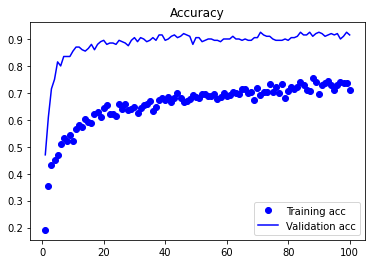

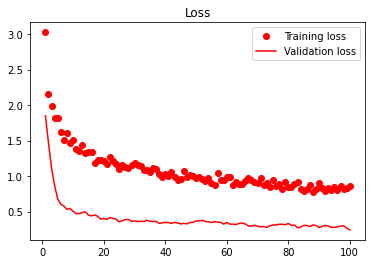

In [14]:
#setting ModelCheckpoint
checkpoint_dir = os.getcwd()+"/model"
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint = ModelCheckpoint(filepath=checkpoint_dir+"/"+"weight_1.hdf5",
                            monitor='loss',
                            mode='min',
                            save_best_only=True)

#compiling
optimizer = Adam(lr=0.0001)
loss = "categorical_crossentropy"

my_model.compile(optimizer=optimizer,
              loss=loss,
              metrics=["accuracy"])

#training
history = my_model.fit_generator(train_generator,
                                 steps_per_epoch=len(train_generator),
                                 epochs=epochs,
                                 validation_data=val_generator, 
                                 validation_steps=len(val_generator),
                                 callbacks=[checkpoint])

#visualizing
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()

### 학습 결과 확인하기

In [9]:
# 모델 불러오기

import os
from tensorflow.keras.models import load_model

checkpoint_dir = os.getcwd()+"/model/"
model = my_model
#model = load_model(checkpoint_dir+"weight_1.hdf5")
model.load_weights(checkpoint_dir+"0803_1700")
#model.save_weights("./model/0803_1700")

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 111, 111, 32) 96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 111, 111, 32) 0           Conv2d_1a_3x3_BatchNorm[0][0]    
______________________________________________________________________________________________

[4.8709232e-03 1.9398886e-04 3.3057801e-04 1.9307449e-02 9.0028942e-01
 2.5599950e-03 3.6740494e-03 9.7074022e-04 1.8594776e-03 6.5943338e-02]
New image prediction :  jjin
accuracy : 0.9002894163131714


TypeError: Image data of dtype <U13 cannot be converted to float

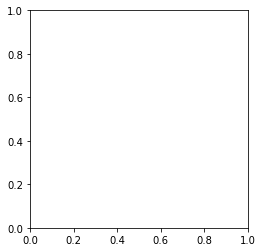

In [10]:
# test 폴더에 있는 이미지를 이용해서 인식 / 분류 실행 
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

targetx = 224
targety = 224

#test_dir = os.getcwd()+"/img/test/"

image_path = []
#for i in os.listdir(test_dir):
    #test_image_name = test_dir + i
    #image_path.append(test_image_name)  

def test(image):
    #img = Image.open(image)
    #img = img.convert("RGB")
    #img = img.resize((targetx,targety))    
    #data = np.asarray(img)
    #X = np.array(data)
    #X = X.astype("float") / 256
    #X = X.reshape(-1, targetx, targety,3)
    
    #res_image = cv2.resize(image, dsize=(224, 224))
    #res_image = res.astype("float") / 256
    #X = res_image.reshape(-1, targetx, targety,3)
    categories = ["cha", "choi", "hyena", "jeonga", "jjin", "junho", "lee", "woo", "yeseo", "yoon" ]
    pred = model.predict(X)
    print(pred[0])
    result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
    print('New image prediction : ',categories[result[0]])
    print("accuracy : {}".format(max(pred[0])))
    plt.imshow(image)
    plt.show()


#res = res.reshape(-1, targetx, targety,3)
test("cropped_2.jpg")

In [11]:
from face_capture3 import *

In [12]:
for i in face_crop(video_capture("C://python_files/new/sample.mp4", 10)):
    for j in i:
        plt.imshow(j)
        plt.show()

영상의 길이 :  391.5912 초
10 초 앞 뒤  0.25 초 frame 불러오기
[i] ==> # detected faces: 0
[i] ==> # detected faces: 0
[i] ==> # detected faces: 0


C:\python_files\transfer_learning/img/test/(101).jpg
New image prediction :  hyena
accuracy : 0.9865009188652039


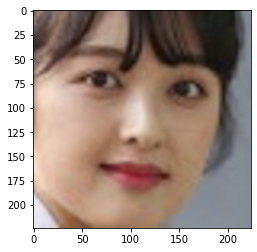

C:\python_files\transfer_learning/img/test/(102).jpg
New image prediction :  hyena
accuracy : 0.9833469390869141


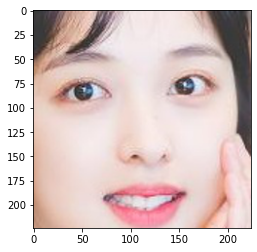

C:\python_files\transfer_learning/img/test/(139).jpg
New image prediction :  yeseo
accuracy : 0.9987956285476685


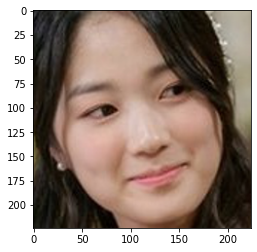

C:\python_files\transfer_learning/img/test/(140).jpg
New image prediction :  yeseo
accuracy : 0.9800648093223572


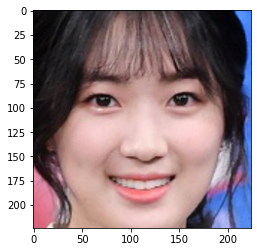

C:\python_files\transfer_learning/img/test/(141).jpg
New image prediction :  yeseo
accuracy : 0.9998055100440979


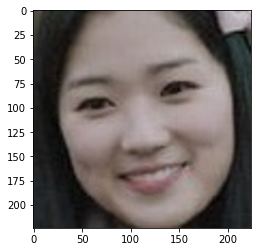

C:\python_files\transfer_learning/img/test/(142).jpg
New image prediction :  yeseo
accuracy : 0.8143408298492432


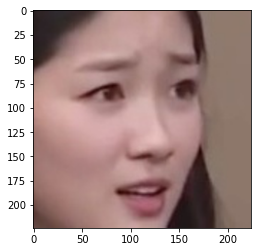

C:\python_files\transfer_learning/img/test/1.jpg
New image prediction :  yeseo
accuracy : 0.9760953187942505


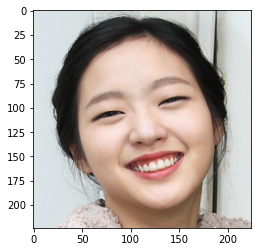

C:\python_files\transfer_learning/img/test/10.JPG
New image prediction :  yeseo
accuracy : 0.9720451831817627


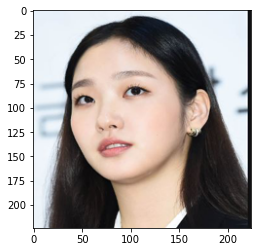

C:\python_files\transfer_learning/img/test/2.jpg
New image prediction :  yeseo
accuracy : 0.9554940462112427


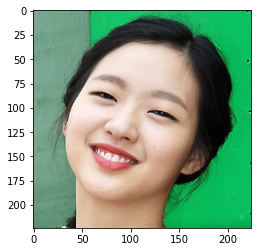

C:\python_files\transfer_learning/img/test/3.jpg
New image prediction :  yeseo
accuracy : 0.9516200423240662


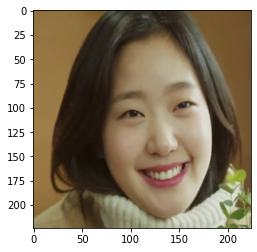

C:\python_files\transfer_learning/img/test/4.jpg
New image prediction :  cha
accuracy : 0.6138898730278015


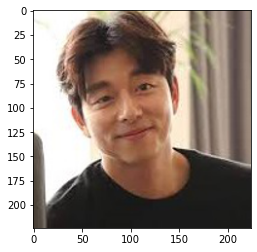

C:\python_files\transfer_learning/img/test/5.jpg
New image prediction :  hyena
accuracy : 0.9903407692909241


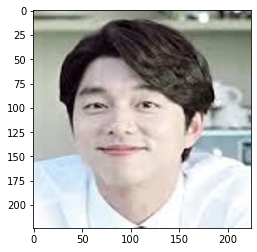

C:\python_files\transfer_learning/img/test/6.jpg
New image prediction :  choi
accuracy : 0.36860594153404236


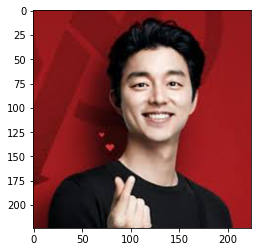

C:\python_files\transfer_learning/img/test/7.JPG
New image prediction :  cha
accuracy : 0.5256358981132507


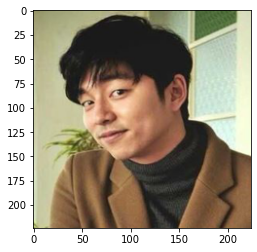

C:\python_files\transfer_learning/img/test/8.JPG
New image prediction :  woo
accuracy : 0.7403509020805359


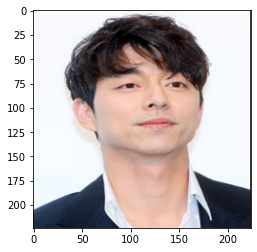

C:\python_files\transfer_learning/img/test/9.JPG
New image prediction :  yoon
accuracy : 0.4106786251068115


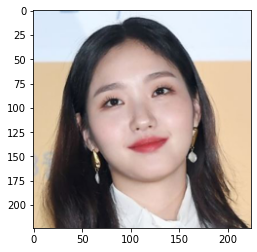

C:\python_files\transfer_learning/img/test/croped_naver_0090.jpg.jpg
New image prediction :  jeonga
accuracy : 0.8232309222221375


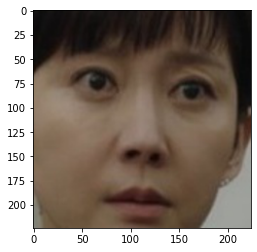

C:\python_files\transfer_learning/img/test/croped_naver_0094.jpg.jpg
New image prediction :  jeonga
accuracy : 0.9688188433647156


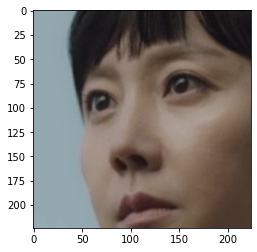

C:\python_files\transfer_learning/img/test/croped_naver_0099.jpg.jpg
New image prediction :  jeonga
accuracy : 0.9607180953025818


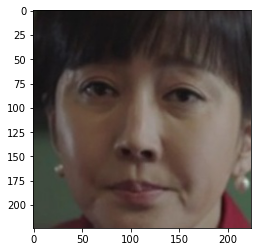

C:\python_files\transfer_learning/img/test/croped_naver_0105.jpg.jpg
New image prediction :  junho
accuracy : 0.9661347270011902


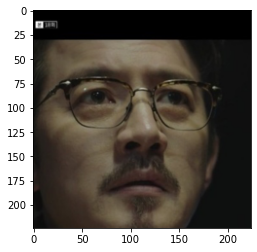

C:\python_files\transfer_learning/img/test/croped_naver_0106.jpg.jpg
New image prediction :  junho
accuracy : 0.9844843745231628


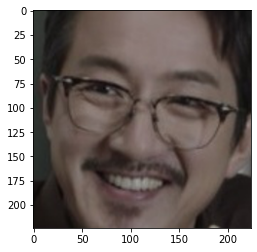

C:\python_files\transfer_learning/img/test/croped_naver_0107.jpg.jpg
New image prediction :  junho
accuracy : 0.99928879737854


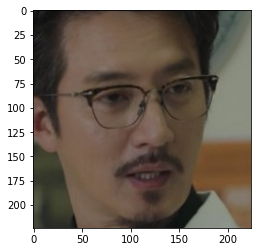

C:\python_files\transfer_learning/img/test/cropped108.jpg
New image prediction :  woo
accuracy : 0.9999996423721313


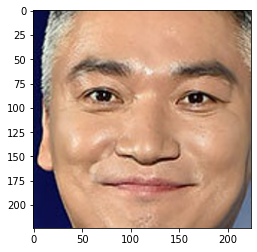

C:\python_files\transfer_learning/img/test/cropped109 (1).jpg
New image prediction :  woo
accuracy : 0.9996304512023926


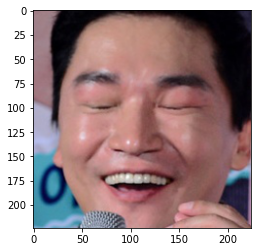

C:\python_files\transfer_learning/img/test/cropped109.jpg
New image prediction :  yoon
accuracy : 0.9949201941490173


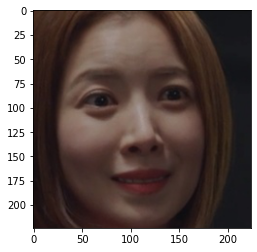

C:\python_files\transfer_learning/img/test/cropped111.jpg
New image prediction :  woo
accuracy : 0.9999107122421265


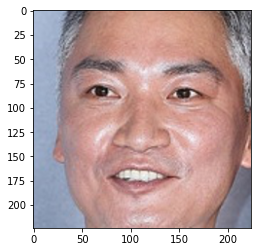

C:\python_files\transfer_learning/img/test/cropped112.jpg
New image prediction :  jjin
accuracy : 0.9939436316490173


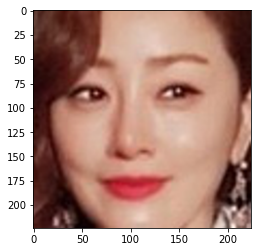

C:\python_files\transfer_learning/img/test/cropped114.jpg
New image prediction :  jjin
accuracy : 0.9999978542327881


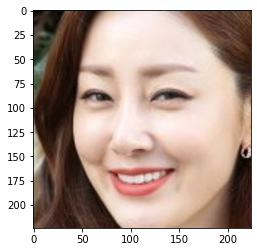

C:\python_files\transfer_learning/img/test/cropped115.jpg
New image prediction :  jjin
accuracy : 0.9844675660133362


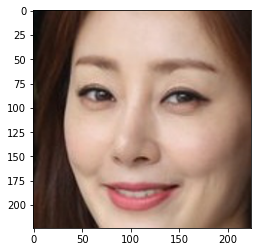

C:\python_files\transfer_learning/img/test/cropped161.jpg
New image prediction :  yoon
accuracy : 0.9999455213546753


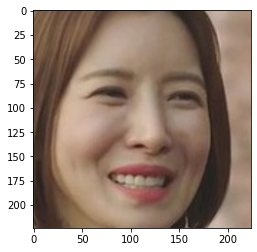

C:\python_files\transfer_learning/img/test/cropped51 (1).jpg
New image prediction :  cha
accuracy : 0.9977038502693176


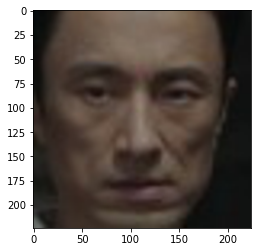

C:\python_files\transfer_learning/img/test/cropped51 (2).jpg
New image prediction :  jjin
accuracy : 0.8342709541320801


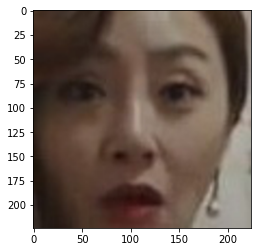

C:\python_files\transfer_learning/img/test/cropped51 (3).jpg
New image prediction :  woo
accuracy : 0.9999971389770508


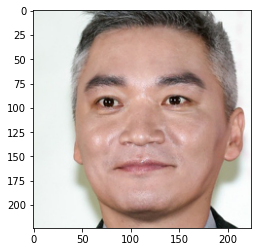

C:\python_files\transfer_learning/img/test/cropped52 (1).jpg
New image prediction :  cha
accuracy : 0.9999756813049316


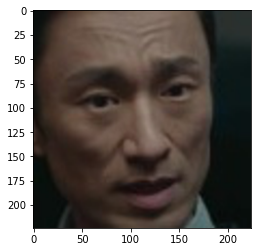

C:\python_files\transfer_learning/img/test/cropped52 (2).jpg
New image prediction :  jjin
accuracy : 0.9999853372573853


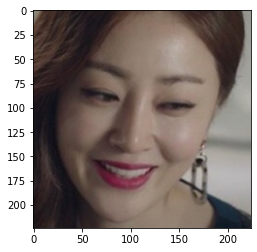

C:\python_files\transfer_learning/img/test/cropped52 (3).jpg
New image prediction :  woo
accuracy : 0.9653478264808655


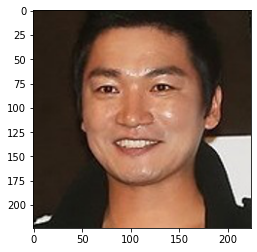

C:\python_files\transfer_learning/img/test/cropped53 (1).jpg
New image prediction :  cha
accuracy : 0.9939834475517273


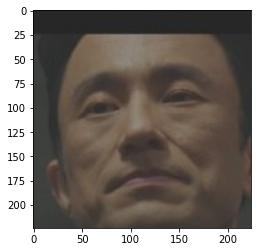

C:\python_files\transfer_learning/img/test/cropped53 (2).jpg
New image prediction :  jjin
accuracy : 0.9999880790710449


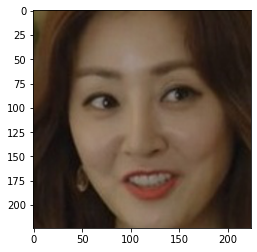

C:\python_files\transfer_learning/img/test/cropped53 (3).jpg
New image prediction :  woo
accuracy : 0.9999972581863403


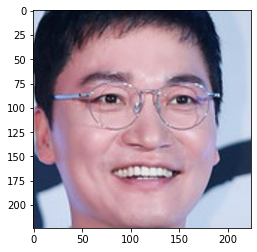

C:\python_files\transfer_learning/img/test/cropped54 (1).jpg
New image prediction :  cha
accuracy : 0.9988719820976257


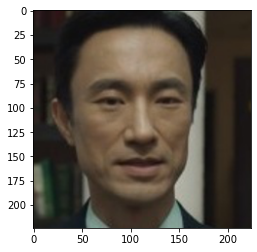

C:\python_files\transfer_learning/img/test/cropped54 (2).jpg
New image prediction :  woo
accuracy : 0.9999998807907104


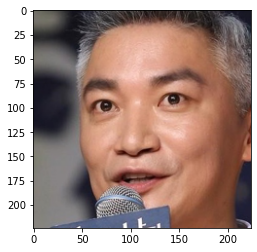

C:\python_files\transfer_learning/img/test/cropped55 (1).jpg
New image prediction :  woo
accuracy : 0.9999805688858032


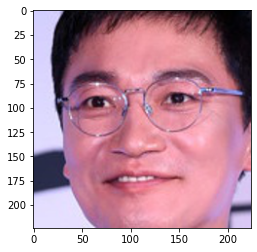

C:\python_files\transfer_learning/img/test/cwws498.jpg
New image prediction :  choi
accuracy : 0.9994258880615234


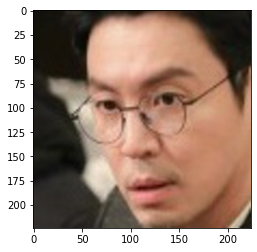

C:\python_files\transfer_learning/img/test/cwws500.jpg
New image prediction :  choi
accuracy : 0.9996790885925293


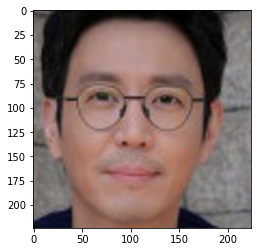

C:\python_files\transfer_learning/img/test/cwws501.jpg
New image prediction :  junho
accuracy : 0.5156710147857666


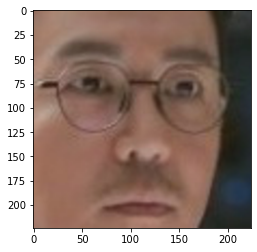

C:\python_files\transfer_learning/img/test/cwws503.jpg
New image prediction :  choi
accuracy : 0.9999988079071045


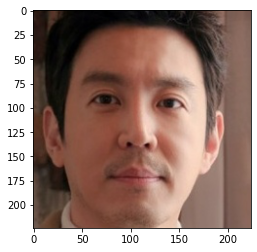

C:\python_files\transfer_learning/img/test/ITRS108.jpg
New image prediction :  lee
accuracy : 0.9984057545661926


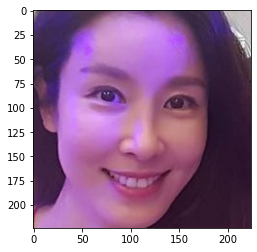

C:\python_files\transfer_learning/img/test/ITRS268.jpg
New image prediction :  lee
accuracy : 0.990473210811615


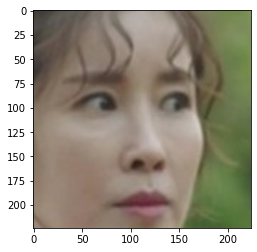

C:\python_files\transfer_learning/img/test/ITRS269.jpg
New image prediction :  lee
accuracy : 0.8958091139793396


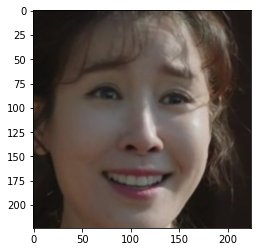

C:\python_files\transfer_learning/img/test/ITRS270.jpg
New image prediction :  lee
accuracy : 0.999975323677063


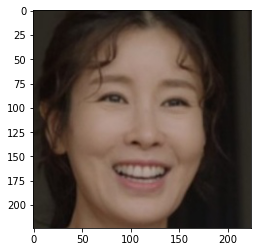

In [126]:
# test 폴더에 있는 이미지를 이용해서 인식 / 분류 실행 
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

targetx = 224
targety = 224

test_dir = os.getcwd()+"/img/test/"

image_path = []
for i in os.listdir(test_dir):
    test_image_name = test_dir + i
    image_path.append(test_image_name)  

for image in image_path:
    #print(image)
    img = Image.open(image)
    img = img.convert("RGB")
    img = img.resize((targetx,targety))    
    data = np.asarray(img)
    X = np.array(data)
    X = X.astype("float") / 256
    X = X.reshape(-1, targetx, targety,3)
    #print(X)
    categories = ["cha", "choi", "hyena", "jeonga", "jjin", "junho", "lee", "woo", "yeseo", "yoon" ]
    pred = model.predict(X)
    #print(pred[0])
    result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
    print('New image prediction : ',categories[result[0]])
    print("accuracy : {}".format(max(pred[0])))
    plt.imshow(img)
    plt.show()

In [172]:
import cv2
from matplotlib import pyplot as plt
import os
import time
import sys
sys.path.append("C://python_files/new")

#from utility import post_process

def post_process2(frame, outs, conf_threshold, nms_threshold):
    frame_height = frame.shape[0]
    frame_width = frame.shape[1]

    # Scan through all the bounding boxes output from the network and keep only
    # the ones with high confidence scores. Assign the box's class label as the
    # class with the highest score.
    confidences = []
    boxes = []
    final_boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > conf_threshold:
                center_x = int(detection[0] * frame_width)
                center_y = int(detection[1] * frame_height)
                
                width = int(detection[2] * frame_width * 1.6)
                height = int(detection[3] * frame_height * 1.6)
                left = int(center_x - width / 2)
                
                top = int(center_y - height / 2)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # Perform non maximum suppression to eliminate redundant
    # overlapping boxes with lower confidences.
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold,
                               nms_threshold)

    for i in indices:
        i = i[0]
        box = boxes[i]
        #left = box[0]
        #top = box[1]
        #width = box[2]
        #height = box[3]
        if box[0] <= 1 :
            box[0] = 1
        if box[1] <= 1 :
            box[1] = 1
        if box[0] + box[2] >= frame_width :
            box[2] = frame_width-left-1
        if box[1] + box[3] >= frame_height :
            box[3] = frame_height-top-1
        final_boxes.append(box)
        left, top, right, bottom = refined_box(left, top, width, height)
        # draw_predict(frame, confidences[i], left, top, left + width,
        #              top + height)
        #draw_predict(frame, confidences[i], left, top, right, bottom)
    return final_boxes

def video_capture(videoFile, second_set):
    #videoFile = "C://python_files/new/sample.mp4" # 동영상 파일 주소 
    capture = cv2.VideoCapture() 
    capture.open(videoFile)

    # 초당 프레임 수를 get 클래스로 계산해 변수에 담음
    fps = capture.get(cv2.CAP_PROP_FPS) 
    # 영상의 총 프레임 수를 get 클래스로 계산해 변수에 담음
    frame_count = capture.get(cv2.CAP_PROP_FRAME_COUNT)

    timestamps = [capture.get(cv2.CAP_PROP_POS_MSEC)]
    calc_timestamps = [0.0]

    duration = frame_count / fps 
    print("영상의 길이 : ", duration, "초")

    #second_set = 3 #여기서 몇 초인지를 지정해주자.
    count = 0 # count 번째 사진 increase_width = 10 # 여기서 몇초마다 찍을건지 세팅하면 됌.

    second_width = 0.25 #앞 뒤 몇 초 frame을 들고 올 것인지 지정
    if second_set <= second_width :
        second = 0
    elif second_set >= duration - second_width :
        second = duration - second_width
    else :
        second = second_set - second_width

    print(second_set, "초 앞 뒤 ",second_width,"초 frame 불러오기")

    frame_list = []
    while True:
        if second > second_set + second_width :
            break
        capture.set(cv2.CAP_PROP_POS_MSEC, second * 1000) 
        ret,frame = capture.read()
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        #print(second, "초 에서 캡쳐") 

        second = second + 5/fps

        
        
        frame_list.append(frame_rgb)
    return frame_list

    print('----- Finish Video Capture! -----')

CONF_THRESHOLD = 0.5
NMS_THRESHOLD = 0.4
IMG_WIDTH = 416
IMG_HEIGHT = 416

# Give the configuration and weight files for the model and load the network
# using them.
CUR_DIR = os.path.abspath('.')
weights_path = os.path.join(CUR_DIR, 'C://python_files/pafy/yoloface/model-weights/yolov3-wider_16000.weights')
config_path =  os.path.join(CUR_DIR, 'C://python_files/pafy/yoloface/cfg/yolov3-face.cfg')
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)


def face_detection(frame):
    # Create a 4D blob from a frame.
    try:
        crop_list=[]
        blob = cv2.dnn.blobFromImage(frame, 1 / 255, (IMG_WIDTH, IMG_HEIGHT),
                                        [0, 0, 0], 1, crop=False)
        # Sets the input to the network
        net.setInput(blob)
        # Runs the forward pass to get output of the output layers
        outs = net.forward(get_outputs_names(net))

        # Remove the bounding boxes with low confidence
        faces = post_process2(frame, outs, CONF_THRESHOLD, NMS_THRESHOLD)
        #print(faces)


        print('[i] ==> # detected faces: {}'.format(len(faces)))
        print('#' * 60)

        for i in range(len(faces)):
            left = faces[i][0]
            top = faces[i][1]
            width = faces[i][2]
            height = faces[i][3]
            right = left + width
            bottom = top + height


            crop = frame[top:bottom,left:right]
            crop_list.append(crop)
    except :
        print('[i] ==> # detected faces: 0')
    return crop_list
def face_crop2(frame_list):
    frame_list_crop = []
    for i in frame_list:
        frame_list_crop.append(face_detection(i))
    return frame_list_crop

In [173]:
img_list = face_crop2(video_capture("C://python_files/new/sample.mp4", 10))

영상의 길이 :  391.5912 초
10 초 앞 뒤  0.25 초 frame 불러오기
[i] ==> # detected faces: 2
############################################################
[i] ==> # detected faces: 2
############################################################
[i] ==> # detected faces: 2
############################################################


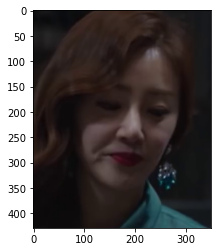

In [176]:
plt.imshow(img_list[0][1])
plt.show()
res = img_list[0][1]

[4.8709232e-03 1.9398886e-04 3.3057801e-04 1.9307449e-02 9.0028942e-01
 2.5599950e-03 3.6740494e-03 9.7074022e-04 1.8594776e-03 6.5943338e-02]
New image prediction :  jjin
accuracy : 0.9002894163131714


TypeError: Image data of dtype <U13 cannot be converted to float

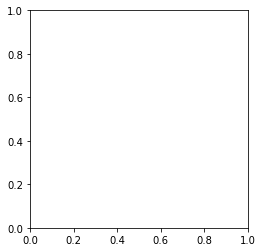

In [178]:
test("cropped_2.jpg")

In [171]:
img_list = face_crop2(video_capture("C://python_files/new/sample.mp4", 10))

NameError: name 'face_crop2' is not defined

In [108]:
import cv2
import numpy as np

res = cv2.resize(img_list[0][0], dsize=(224, 224))
res = res.astype("float") / 256
res = res.reshape(-1, targetx, targety,3)

#res.shape

In [98]:
print(type(img_list[0][0]))

<class 'numpy.ndarray'>


New image prediction :  hyena
accuracy : 0.5631209015846252


TypeError: Invalid shape (1, 224, 224, 3) for image data

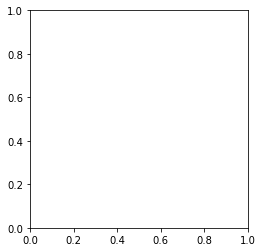

In [109]:
test(res)

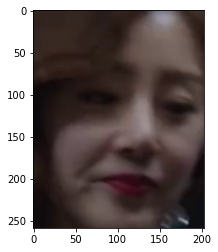

In [131]:
plt.imshow(img_list[10][1])
plt.show()